In [130]:
import numpy as np
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score 

In [131]:
df = pd.read_csv(r'Liar_Dataset.csv', encoding='latin1')
df.head()

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,11972.json,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


# 1 Preprocessing 

In [132]:
df.isnull().sum()

[ID].json                  0
label                      0
statement                  0
subject(s)                 0
speaker                    0
speaker's job title     3566
state info              2749
party affiliation          0
barely true counts         0
false counts               0
half true counts           0
mostly true counts         0
pants on fire counts       0
venue                    129
dtype: int64

In [133]:
df.replace('', np.nan, inplace=True)

In [134]:
df['venue']= df['venue'].replace(np.nan, 'Unknown')
df["speaker's job title"]= df["speaker's job title"].replace(np.nan, 'Unknown')
df["state info"]= df["state info"].replace(np.nan, 'Unknown')

In [135]:
print(df.shape)

(12787, 14)


In [136]:
print(df.isnull().sum())

[ID].json               0
label                   0
statement               0
subject(s)              0
speaker                 0
speaker's job title     0
state info              0
party affiliation       0
barely true counts      0
false counts            0
half true counts        0
mostly true counts      0
pants on fire counts    0
venue                   0
dtype: int64


In [137]:
print(df['statement'].str.len().max())

3192


In [138]:
print(df['statement'].str.len().mean())

107.12278094940173


In [139]:
print(df['statement'].str.len().min())

11


In [140]:
print(df['label'].value_counts())

label
half-true      2627
FALSE          2504
mostly-true    2454
barely-true    2102
TRUE           2053
pants-fire     1047
Name: count, dtype: int64


In [141]:
df['content'] = df['statement']+' '+df['speaker']+' '+df['speaker\'s job title']+' '+df['state info']+' '+df['venue']

In [142]:
print(df['content'].head())

0    Building a wall on the U.S.-Mexico border will...
1    Wisconsin is on pace to double the number of l...
2    Says John McCain has done nothing to help the ...
3    Suzanne Bonamici supports a plan that will cut...
4    When asked by a reporter whether hes at the ce...
Name: content, dtype: object


# separating the data & label

In [143]:
x= df['content']
y= df['label']

In [144]:
print(x)

0        Building a wall on the U.S.-Mexico border will...
1        Wisconsin is on pace to double the number of l...
2        Says John McCain has done nothing to help the ...
3        Suzanne Bonamici supports a plan that will cut...
4        When asked by a reporter whether hes at the ce...
                               ...                        
12782    For the first time in more than a decade, impo...
12783    Says Donald Trump has bankrupted his companies...
12784    John McCain and George Bush have "absolutely n...
12785    A new poll shows 62 percent support the presid...
12786    No one claims the report vindicating New Jerse...
Name: content, Length: 12787, dtype: object


## Visualization

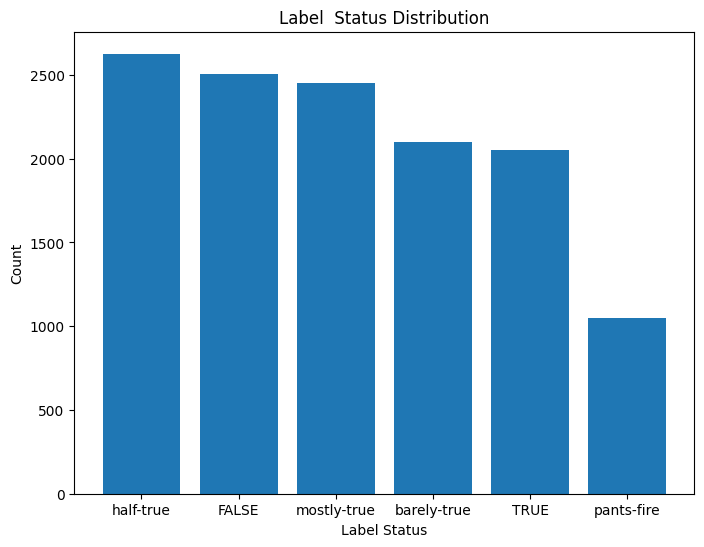

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
loan_status_counts = df['label'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.xlabel('Label Status')
plt.ylabel('Count')
plt.title('Label  Status Distribution')
plt.show()

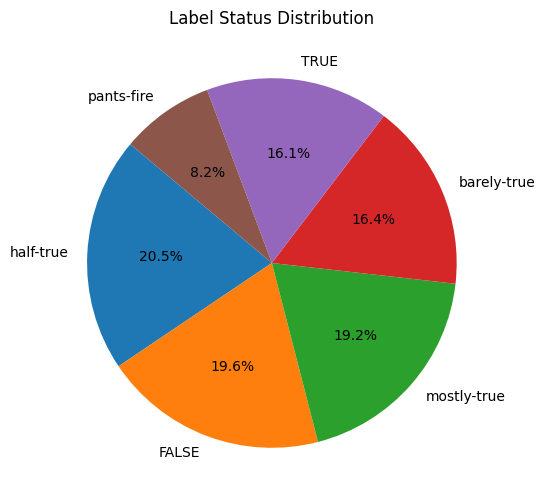

In [146]:
plt.figure(figsize=(8, 6))
loan_status_counts = df['label'].value_counts()
plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Status Distribution')
plt.show()

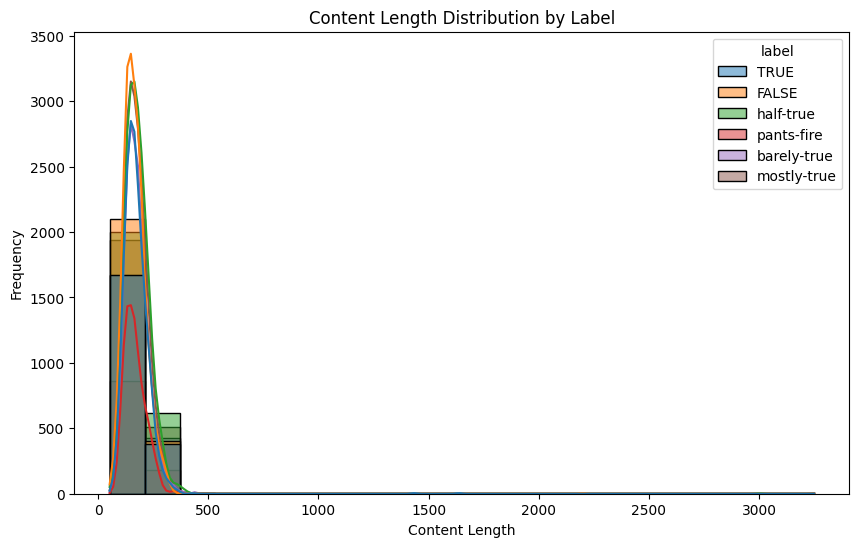

In [147]:
df['content_length'] = df['content'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='content_length', hue='label', bins=20, kde=True)
plt.title("Content Length Distribution by Label")
plt.xlabel("Content Length")
plt.ylabel("Frequency")
plt.show()


# Splitting the dataset to training & test data

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# converting the textual data to numerical data

In [149]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=107)
X_train_vectorized = vectorizer.fit_transform(x_train) 
x_test_vectorized = vectorizer.transform(x_test)

# Save the fitted vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [150]:
print(X_train_vectorized.shape)

(8950, 107)


# Random Forest Classification

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [152]:
rf_model.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [153]:
y_pred_rf = rf_model.predict(X_train_vectorized)  
print(y_pred_rf)

['pants-fire' 'mostly-true' 'half-true' ... 'FALSE' 'FALSE' 'FALSE']


In [154]:
print("confusion_matrix:\n",confusion_matrix(y_train, y_pred_rf))

confusion_matrix:
 [[1681   10   17   13   14   11]
 [  24 1342   15   15   13    8]
 [  26   13 1427   14   15    9]
 [  27   12   13 1746   15    7]
 [  28   13   15    4 1652    2]
 [  23    6   10    6    5  699]]


In [155]:
print("classification_report:", classification_report(y_train, y_pred_rf))

classification_report:               precision    recall  f1-score   support

       FALSE       0.93      0.96      0.95      1746
        TRUE       0.96      0.95      0.95      1417
 barely-true       0.95      0.95      0.95      1504
   half-true       0.97      0.96      0.97      1820
 mostly-true       0.96      0.96      0.96      1714
  pants-fire       0.95      0.93      0.94       749

    accuracy                           0.95      8950
   macro avg       0.95      0.95      0.95      8950
weighted avg       0.96      0.95      0.96      8950



In [156]:
print("Accuracy:\n", accuracy_score(y_train, y_pred_rf)*100)

Accuracy:
 95.49720670391062


In [157]:
from sklearn.metrics import f1_score, precision_score, recall_score 
print("F1 Score:", f1_score(y_train, y_pred_rf, average='weighted')*100)

F1 Score: 95.50048353826294


In [158]:
print("Precision:", precision_score(y_train, y_pred_rf, average='weighted')*100)

Precision: 95.51986898429044


In [159]:
print("Recall:", recall_score(y_train, y_pred_rf, average='weighted')*100)

Recall: 95.49720670391062


In [160]:
joblib.dump(rf_model, 'random_forest.joblib')
print("Model saved as random_forest.joblib")

Model saved as random_forest.joblib
